# Deskripsi Proyek

Perusahaan asuransi bernama "Sure Tomorrow" ingin menyelesaikan beberapa masalah dengan bantuan *machine learning*. Anda pun diminta untuk mengevaluasi kemungkinan tersebut.

- Tugas 1: Temukan klien yang mirip dengan kriteria klien tertentu. Tugas ini akan memudahkan perusahaan untuk melakukan pemasaran.
- Tugas 2: Prediksi apakah klien baru kemungkinan akan mengambil klaim asuransi. Apakah prediksi model lebih baik daripada prediksi model *dummy*?
- Tugas 3: Prediksi besaran klaim asuransi yang mungkin diterima klien baru menggunakan model regresi linear.
- Tugas 4: Lindungi data pribadi klien tanpa merusak model dari tugas sebelumnya. Sangatlah penting untuk mengembangkan algoritme transformasi data yang dapat mencegah penyalahgunaan informasi pribadi klien jika data tersebut jatuh ke tangan yang salah. Hal ini disebut penyembunyian data atau pengaburan data. Namun, prosedur perlindungan datanya pun perlu diperhatikan agar kualitas *model machine* learning tidak menurun. Di sini, Anda tidak perlu memilih model yang terbaik, cukup buktikan bahwa algoritme Anda bekerja secara akurat.

# Pra-pemrosesan & Eksplorasi Data

## Inisialisasi

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns,matplotlib.pyplot as plt  

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.linear_model
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from IPython.display import display

## Muat Data

Muat data dan lakukan pemeriksaan untuk memastikan data bebas dari permasalahan.

In [5]:
df = pd.read_csv('/Users/sultanazhari/Downloads/Visual Studio/Project/Triple10/data/insurance_us.csv')

Kami mengganti nama kolom untuk membuat kode terlihat lebih konsisten dengan gayanya.

In [6]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [7]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
556,1,21.0,55300.0,2,0
3002,1,32.0,47500.0,1,0
2431,1,27.0,61000.0,0,0
4068,1,22.0,48600.0,1,0
298,0,20.0,48200.0,1,0
2909,1,36.0,35900.0,1,0
2443,1,25.0,32700.0,0,0
2186,1,34.0,33600.0,1,0
718,1,22.0,32600.0,1,0
218,0,29.0,38500.0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


<div class="alert-info">
    

<b>Note</b>

<b>gender</b> - Jenis kelamin. - Data OK <br>
<b>age</b> - Umur. - Type data Float, sehingga perlu diubah menjadi interger <br>
<b>income</b> - Penghasilan - Type data Float, sehingga perlu diubah menjadi interger <br>
<b>family_members</b> - Jumlah anggota keluarga. - Data OK<br>
<b>insurance_benefits</b> - 1 Menggunakan asuransi, 0 Tidak menggunakan asuransi. - Data OK<br>




In [9]:
# Merubah Type data pada kolom umur dan penghasilan
df['age'] = df['age'].astype(int)
df['income'] = df['income'].astype(int)

In [10]:
# periksa apakah proses pengubahannya sudah berhasil
df.head(5)

,gender,age,income,family_members,insurance_benefits
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


In [11]:
# Melakukan pengecekan data duplikat
df.duplicated().sum()

153

In [12]:
# Menghapus data duplikat agar tidak terjadi informasi redundant
df = df.drop_duplicates()

In [13]:
# Melakukan pengecekan kembali
df.duplicated().sum()

0

## EDA

Mari kita periksa dengan cepat, apakah ada kelompok pelanggan tertentu dengan melihat plot pasangan?

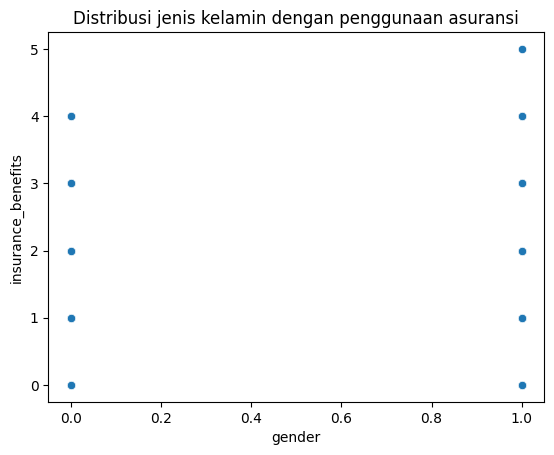

In [14]:
# Melihat distribusi antara jenis kelamin dengan penggunaan asuransi. 
plt.title('Distribusi jenis kelamin dengan penggunaan asuransi')
sns.scatterplot(data=df, x='gender', y='insurance_benefits')
plt.show()

<div class="alert-info">
    

<b>Insight</b>
    
Tidak terdapat perbedaan signifikan antara jenis kelamin dengan penggunaan asuransi






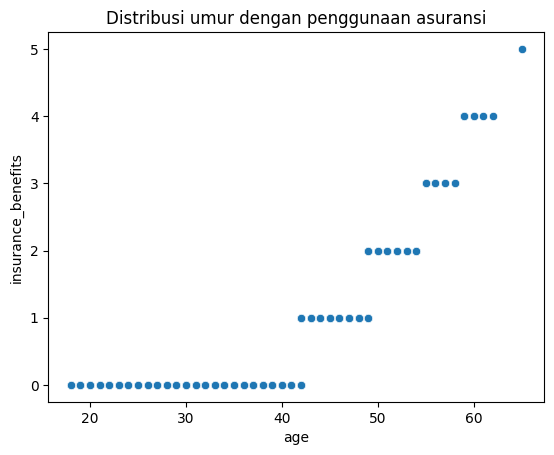

In [15]:
# Melihat distribusi antara umur dengan penggunaan asuransi. 
plt.title('Distribusi umur dengan penggunaan asuransi')
sns.scatterplot(data=df, x='age', y='insurance_benefits')
plt.show()

<div class="alert-info">
    

<b>Insight</b>
    
Makin tinggi umur, makin banyak pula yang melakukan klaim asuransi.





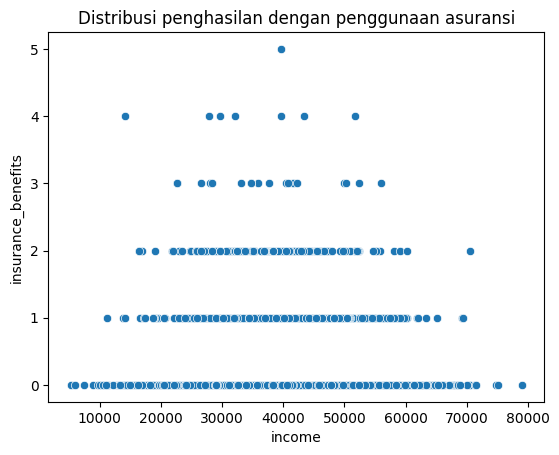

In [16]:
# Melihat distribusi antara umur dengan penggunaan asuransi. 
plt.title('Distribusi penghasilan dengan penggunaan asuransi')
sns.scatterplot(data=df, x='income', y='insurance_benefits')
plt.show()

<div class="alert-info">
    

<b>Insight</b>
    
Tidak terdapat perbedaan signifikan antara income dengan penggunaan asuransi


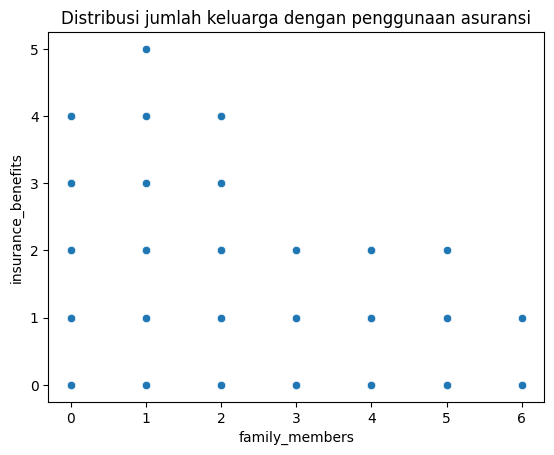

In [17]:
# Melihat distribusi antara jumlah keluarga dengan penggunaan asuransi. 
plt.title('Distribusi jumlah keluarga dengan penggunaan asuransi')
sns.scatterplot(data=df, x='family_members', y='insurance_benefits')
plt.show()

<div class="alert-info">
    

<b>Insight</b>
    
Dapat dikatakan makin banyak jumlah keluarga, penggunaan klaim asuransi lebih sedikit
agak sulit untuk melihat kelompok (klaster) yang jelas mengingat sulitnya menggabungkan beberapa variabel secara bersamaan (untuk menganalisis distribusi multivariat). 

# Tugas 1. Klien yang Mirip

Dalam bahasa pemrograman ML, penting untuk mengembangkan prosedur yang bisa menentukan *k-nearest neighbors* (objek) pada objek tertentu berdasarkan jarak antar objek.

Anda mungkin ingin mengulas kembali pelajaran berikut (bab -> pelajaran)
- Jarak Antar Vektor -> Jarak Euklides
- Jarak Antar Vektor -> Jarak Manhattan

Untuk menyelesaikan tugas ini, kita bisa mencoba beberapa metrik jarak.

Buatlah sebuah fungsi yang menampilkan *k-nearest neighbors* terdekat untuk objek ke-n berdasarkan metrik jarak tertentu.  Besarnya klaim asuransi yang diterima tidak perlu diperhitungkan dalam tugas ini.

Anda bisa menggunakan implementasi algoritme kNN yang sudah tersedia di Scikit-learn  (periksa [tautan](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) ini) atau menggunakan punya Anda sendiri.

Uji algoritme tersebut untuk empat kombinasi dari dua kasus
- Penskalaan
  - data tidak diskalakan
  - data diskalakan dengan [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Metrik Jarak
  - Euklides
  - Manhattan

Jawablah pertanyaan-pertanyaan berikut:
- Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?
- Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [17]:
def get_knn(df, n, k, metric):
    
    """
    Menampilkan k nearest neighbors

    :param df: DataFrame Pandas digunakan untuk menemukan objek-objek yang mirip di dalamnya
    :param n: nomor objek yang dicari k nearest neighbors
    :param k: jumlah k nearest neighbors yang ditampilkan
    :param metric: nama metrik jarak
    """

    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=metric).fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)

    list_index = df.iloc[nbrs_indices[0]].index

    df_res = pd.concat([df.iloc[nbrs_indices[0]].reset_index(drop=True),
                        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance']).reset_index(drop=True)
        ], axis=1).set_index(list_index)

    return df_res

Sekarang, mari kita dapatkan catatan yang mirip untuk setiap kombinasi yang ada

In [18]:
# List orang yang dekat dengan orang yang ada di index 100 dengan menggunakan rumus Euclidean
get_knn(df, n=100, k=5, metric='euclidean')

,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300,1,0,0.000000
1831,0,20,37300,2,0,1.414214
4278,1,19,37300,2,0,1.414214
2624,1,19,37300,0,0,1.414214
1086,0,22,37300,3,0,3.605551


In [19]:
# List orang yang dekat dengan orang yang ada di index 100 dengan menggunakan rumus Manhattan
get_knn(df, n=100, k=5, metric='manhattan')

,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300,1,0,0.0
4278,1,19,37300,2,0,2.0
2624,1,19,37300,0,0,2.0
1831,0,20,37300,2,0,2.0
1086,0,22,37300,3,0,5.0


<div class="alert-info">
    

<b>Note</b>

Terlihat pada orang yang terdekat yang muncul memiliki kesamaan income, dimana hal ini disebabkan karena nilai income yang tinggi dan dianggap dominan.


Mengatur skala data.

In [20]:
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [21]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2422,0.0,0.307692,0.350633,0.000000,0
1389,1.0,0.369231,0.464557,0.166667,0
2026,1.0,0.615385,0.563291,0.000000,0
4819,0.0,0.507692,0.496203,0.000000,0
518,1.0,0.507692,0.482278,0.333333,0


In [22]:
# List orang yang dekat dengan orang yang ada di index 100 setelah discaling dan menggunakan rumus euclidean
get_knn(df_scaled, n=100, k=5, metric='euclidean')

,gender,age,income,family_members,insurance_benefits,distance
100,0.0,0.292308,0.472152,0.166667,0,0.000000
243,0.0,0.292308,0.467089,0.166667,0,0.005063
4915,0.0,0.292308,0.477215,0.166667,0,0.005063
1323,0.0,0.292308,0.456962,0.166667,0,0.015190
811,0.0,0.307692,0.470886,0.166667,0,0.015437


In [23]:
# List orang yang dekat dengan orang yang ada di index 100 setelah discaling dan menggunakan rumus Manhattan
get_knn(df_scaled, n=100, k=5, metric='manhattan')

,gender,age,income,family_members,insurance_benefits,distance
100,0.0,0.292308,0.472152,0.166667,0,0.000000
4915,0.0,0.292308,0.477215,0.166667,0,0.005063
243,0.0,0.292308,0.467089,0.166667,0,0.005063
1323,0.0,0.292308,0.456962,0.166667,0,0.015190
811,0.0,0.307692,0.470886,0.166667,0,0.016650


**Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?** 

Ya Berpengaruh, Data yang muncul adalah data yang mimiliki kesamaan pada nilai dominan.
pada kasus ini nilai tinggi yang dominan adalah income. sehingga pada saat menggunakan algoritma kNN, yang dicari terdekat berdasarkan income atau nilai dominan.


sedangkan setelah dilakukan skala, datanya cendrung sesuai.

**Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?** 

Keduanya data yang muncul mirip saat menggunakan metrik euklides dan manhattan.

# Tugas 2. Apakah klien kemungkinan menerima klaim asuransi?

Dalam konteks *machine learning*, tugas ini sama seperti tugas klasifikasi biner.

Dengan target insurance_benefits yang lebih dari nol, coba evaluasi apakah model klasifikasi kNN merupakan pendekatan yang lebih baik daripada model *dummy*.

Instruksi:
- Buat pengklasifikasi berbasis KNN dan ukur kualitasnya dengan metrik F1 untuk k=1..10 bagi data asli dan data yang diskalakan. Akan menarik untuk melihat bagaimana k dapat memengaruhi metrik evaluasi, dan apakah penskalaan data membuat hasilnya berbeda. Gunakan implementasi algoritme klasifikasi kNN yang tersedia di Scikit-learn (periksa [tautan ini](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) atau gunakan milik Anda sendiri.
- Buat model *dummy* yang acak untuk kasus ini. Model tersebut harusnya menampilkan "1" dengan beberapa probabilitas. Mari kita uji model dengan empat nilai probabilitas: 0, probabilitas membayar benefit asuransi apa pun; 0,5; 1.

Probabilitas membayar klaim asuransi dapat didefinisikan sebagai

$$
P\{\text{klaim asuransi yang diterima}\}=\frac{\text{jumlah klien yang menerima klaim asuransi}}{\text{jumlah klien secara keseluruhan}}.
$$

Pisahkan keseluruhan data menjadi 70:30 untuk proporsi *training* dan *test set*.

In [24]:
# Bikin kolom baru untuk mengubah orang yang claim dan yang tidak
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype('int')
df.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600,1,0,0
1,0,46,38000,1,1,1
2,0,29,21000,0,0,0
3,0,21,41700,2,0,0
4,1,28,26100,0,0,0


In [25]:
# periksa ketidakseimbangan kelas dengan value_counts()
df['insurance_benefits_received'].value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

In [26]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred.round())
    acc = sklearn.metrics.accuracy_score(y_true, y_pred.round())
    print(f'F1: {f1_score:.2f}')
    print(f'Accuraccy: {acc:.2f}')
    
    
# jika Anda memiliki masalah dengan baris berikut, muat ulang kernel dan jalankan notebook kembali
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred.round(), normalize='all')
    print('Matriks Kesalahan')
    print(cm)

In [27]:
# menghasilkan output dari model acak

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [28]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probabilitasnya: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df), seed=42)
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probabilitasnya: 0.00
F1: 0.00
Accuraccy: 0.88
Matriks Kesalahan
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

Probabilitasnya: 0.12
F1: 0.13
Accuraccy: 0.80
Matriks Kesalahan
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

Probabilitasnya: 0.50
F1: 0.19
Accuraccy: 0.51
Matriks Kesalahan
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

Probabilitasnya: 1.00
F1: 0.21
Accuraccy: 0.12
Matriks Kesalahan
[[0.         0.88384568]
 [0.         0.11615432]]



In [29]:
# Train Test Split
X = df[feature_names]
y = df['insurance_benefits_received']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [30]:
# Scaling data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_names)
X_train.head()

,gender,age,income,family_members
0,-0.999742,-1.186407,-0.224105,1.622794
1,-0.999742,-0.949242,0.170696,-1.095339
2,1.000258,-1.304990,1.112145,1.622794
3,1.000258,1.896740,-2.147496,-0.189295
4,1.000258,-0.119164,0.089711,-1.095339


In [31]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_names)
X_test.head()

,gender,age,income,family_members
0,1.000258,-0.237746,1.061530,-0.189295
1,-0.999742,-0.119164,-1.428755,-1.095339
2,-0.999742,1.066662,0.150450,1.622794
3,1.000258,0.118001,-0.821369,-1.095339
4,1.000258,1.659575,-0.426567,-1.095339


In [32]:
# Bikin model dengan menggunakan KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
# Predict data Training
y_pred_train = knn.predict(X_train)
eval_classifier(y_train, y_pred_train)

F1: 0.98
Accuraccy: 0.99
Matriks Kesalahan
[[8.85478463e-01 7.73794171e-04]
 [4.38483363e-03 1.09362909e-01]]


In [34]:
# Predict data Testing
y_pred_test = knn.predict(X_test)
eval_classifier(y_test, y_pred_test)

F1: 0.94
Accuraccy: 0.99
Matriks Kesalahan
[[0.87216495 0.00206186]
 [0.01134021 0.11443299]]


# Tugas 3. Regresi (dengan Regresi Linear)

Dengan `insurance_benefit` sebagai target, evaluasi berapa RMSE untuk model Regresi Linear.

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
X_train.head()

,gender,age,income,family_members
0,-0.999742,-1.186407,-0.224105,1.622794
1,-0.999742,-0.949242,0.170696,-1.095339
2,1.000258,-1.304990,1.112145,1.622794
3,1.000258,1.896740,-2.147496,-0.189295
4,1.000258,-0.119164,0.089711,-1.095339


In [39]:
X_test.head()

,gender,age,income,family_members
0,1.000258,-0.237746,1.061530,-0.189295
1,-0.999742,-0.119164,-1.428755,-1.095339
2,-0.999742,1.066662,0.150450,1.622794
3,1.000258,0.118001,-0.821369,-1.095339
4,1.000258,1.659575,-0.426567,-1.095339


<div class="alert-info">
    

<b>Note</b>

Data sudah discaling

In [36]:
# Predict data Training
y_pred_train = lr.predict(X_train)
eval_classifier(y_train, y_pred_train)

F1: 0.53
Accuraccy: 0.93
Matriks Kesalahan
[[0.88625226 0.        ]
 [0.07299458 0.04075316]]


In [37]:
# Predict data Testing
y_pred_test = lr.predict(X_test)
eval_classifier(y_test, y_pred_test)

F1: 0.64
Accuraccy: 0.93
Matriks Kesalahan
[[0.8742268  0.        ]
 [0.06701031 0.05876289]]


# Tugas 4. Pengaburan Data

Cara terbaik untuk mengaburkan data adalah dengan mengalikan fitur-fitur numerik (ingat bahwa fitur-fitur tersebut bisa di lihat di matriks $X$) dengan matriks yang dapat dibalik (*invertible*) $P$. 

$$
X' = X \times P
$$

Coba lakukan itu dan periksa bagaimana nilai fitur akan terlihat setelah transformasi. Sifat *invertible* sangat penting pada kasus ini, jadi pastikan $P$ bahwa $P$ bersifat *invertible*.

Anda mungkin ingin meninjau kembali pelajaran 'Matriks dan Operasi Matriks -> Perkalian Matriks' untuk mengingat aturan perkalian matriks dan implementasinya dengan NumPy.

In [73]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [78]:
df_masking = df_pn.to_numpy()

Membuat matriks acak $P$.

In [79]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(df_masking.shape[1], df_masking.shape[1]))

Memeriksa apakah matriks $P$ *invertible*

In [80]:
P_det = np.linalg.det(P)

# Kalau determinan dari matrix nya adalah 0, maka kita tidak bisa masking datanya
print(P_det)

0.24339135998015463


Bisakah Anda menebak usia klien atau pendapatannya setelah dilakukan transformasi?

In [81]:
# Masking data dengan matrix yang sudah kita buat
df_masking = df_masking @ P
df_masking = pd.DataFrame(df_masking, columns=personal_info_column_list)
df_masking.head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


Bisakah Anda memulihkan data asli dari $X'$ jika $P$ sudah diketahui? Coba periksa hal tersebut melalui perhitungan dengan memindahkan $P$ dari sisi kanan rumus di atas ke sisi kiri. Aturan perkalian matriks sangat berguna di sini.

In [82]:
# Mengembalikan data yang sudah di masking
P_inv = np.linalg.inv(P)

In [83]:
df_return = df_masking @ P_inv
df_return.columns = personal_info_column_list
df_return.head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13


Tampilkan ketiga kasus untuk beberapa klien
- Data asli
- Data yang sudah ditransformasikan
- Data yang telah dipulihkan ke semula

In [84]:
pd.concat([df, df_masking, df_return], axis=1, keys=['Asli', 'Masked', 'Return']).head()

Asli                                                   \
  gender   age   income family_members insurance_benefits   
0    1.0  41.0  49600.0            1.0                0.0   
1    0.0  46.0  38000.0            1.0                1.0   
2    0.0  29.0  21000.0            0.0                0.0   
3    0.0  21.0  41700.0            2.0                0.0   
4    1.0  28.0  26100.0            0.0                0.0   

                                    Masked                              \
  insurance_benefits_received       gender           age        income   
0                         0.0  6359.715273  22380.404676  18424.090742   
1                         1.0  4873.294065  17160.367030  14125.780761   
2                         0.0  2693.117429   9486.397744   7808.831560   
3                         0.0  5345.603937  18803.227203  15479.148373   
4                         0.0  3347.176735  11782.829283   9699.998942   

                        Return                                
  family_members        gender   age   income family_members  
0   46000.696690  1.000000e+00  41.0  49600.0   1.000000e+00  
1   35253.455773 -4.473636e-12  46.0  38000.0   1.000000e+00  
2   19484.860631 -2.515869e-12  29.0  21000.0   9.524523e-13  
3   38663.061863 -4.844982e-12  21.0  41700.0   2.000000e+00  
4   24211.273378  1.000000e+00  28.0  26100.0  -1.019907e-13

##  Buktikan Bahwa Pengaburan Data Bisa Bekerja dengan LR

Tugas regresi pada proyek ini telah diselesaikan dengan regresi linear. Tugas selanjutnya adalah untuk membuktikan secara analitis bahwa metode pengaburan data tertentu tidak akan memengaruhi prediksi nilai regresi linear - nilai-nilai prediksi tersebut tidak akan berubah dari hasil awalnya. Apakah Anda yakin Anda bisa melakukannya?? Anda tidak harus yakin sekarang, tetapi Anda harus membuktikannya!

Jadi, data yang ada telah dikaburkan dan sekarang terdapat $X \times P$ alih-alih hanya $X$. Akibatnya, ada bobot lain $w_P$ sebagai
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Bagaimana menghubungkan $w$ dan $w_P$ jika Anda menyederhanakan rumus untuk wP di atas?

Nilai apa yang akan $w_P$ prediksi? 

Apa artinya bagi kualitas regresi linier jika Anda mengukurnya dengan RMSE?

Periksa lampiran B (Sifat-sifat Matriks) di bagian *notebook*. Tersedia beberapa rumus yang berguna di sana!

Tidak ada kode yang begitu penting di sesi ini, hanya penjelasan analitis!

In [85]:
# Training dengan data yang dimasking
X_train, X_test, y_train, y_test = train_test_split(df_masking, y, test_size=0.2, random_state=10)

In [86]:
# Scaling data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=personal_info_column_list)
X_train.head()

,gender,age,income,family_members
0,-0.224252,-0.226030,-0.226096,-0.224962
1,0.169185,0.168677,0.168777,0.169944
2,1.112581,1.110173,1.110247,1.111305
3,-2.146178,-2.144094,-2.144185,-2.146132
4,0.089330,0.089321,0.089478,0.089635


In [87]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=personal_info_column_list)
X_test.head()

,gender,age,income,family_members
0,1.061615,1.061158,1.061257,1.061411
1,-1.429799,-1.429326,-1.429298,-1.428938
2,0.151730,0.152712,0.152426,0.151231
3,-0.821631,-0.821369,-0.821231,-0.821291
4,-0.425849,-0.423696,-0.423709,-0.425366


In [88]:
# Bikin model dengan menggunakan KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
# Predict data Training
y_pred_train = knn.predict(X_train)
eval_classifier(y_train, y_pred_train)

F1: 0.74
Accuraccy: 0.95
Matriks Kesalahan
[[0.8800619  0.00619035]
 [0.04384834 0.06989941]]


In [90]:
# Predict data Testing
y_pred_test = knn.predict(X_test)
eval_classifier(y_test, y_pred_test)

F1: 0.35
Accuraccy: 0.89
Matriks Kesalahan
[[0.85773196 0.01649485]
 [0.09587629 0.02989691]]


## Uji Regresi Linear dengan Pengaburan Data

Sekarang, mari kita buktikan kalau Regresi Linear dapat bekerja secara komputasi dengan transformasi pengaburan yang dipilih.

Buat prosedur atau kelas yang menjalankan regresi linear dengan pengaburan data. Anda bisa menggunakan regresi linear yang tersedia di scikit-learn atau milik Anda sendiri.

Jalankan regresi linear terhadap data asli dan data yang disamarkan, bandingkan nilai prediksi dan RMSE, serta nilai metrik $R^2$. Apakah ada perbedaan?

**Prosedur**

- Buat matriks persegi $P$ dari angka acak.
- Periksa apakah matriks tersebut *invertible*. Jika tidak, ulangi dari langkah pertama sampai kita mendapatkan matriks yang bisa dibalik (*invertible*).
- <! ketik komentar Anda di sini !>
- Gunakan $XP$ sebagai matriks fitur baru 

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [92]:
X_train.head()

,gender,age,income,family_members
0,-0.224252,-0.226030,-0.226096,-0.224962
1,0.169185,0.168677,0.168777,0.169944
2,1.112581,1.110173,1.110247,1.111305
3,-2.146178,-2.144094,-2.144185,-2.146132
4,0.089330,0.089321,0.089478,0.089635


In [93]:
X_test.head()

,gender,age,income,family_members
0,1.061615,1.061158,1.061257,1.061411
1,-1.429799,-1.429326,-1.429298,-1.428938
2,0.151730,0.152712,0.152426,0.151231
3,-0.821631,-0.821369,-0.821231,-0.821291
4,-0.425849,-0.423696,-0.423709,-0.425366


<div class="alert-info">
    

<b>Note</b>

Data sudah discaling

In [95]:
# Predict data Training
y_pred_train = lr.predict(X_train)
eval_classifier(y_train, y_pred_train)

F1: 0.53
Accuraccy: 0.93
Matriks Kesalahan
[[0.88625226 0.        ]
 [0.07299458 0.04075316]]


In [96]:
# Predict data Testing
y_pred_test = lr.predict(X_test)
eval_classifier(y_test, y_pred_test)

F1: 0.64
Accuraccy: 0.93
Matriks Kesalahan
[[0.8742268  0.        ]
 [0.06701031 0.05876289]]


# Kesimpulan

<div class="alert-info">
    

<b>Kesimpulan</b>

- Hasil dari prediksi Data masking maupun data asli keduanya sama

# Apendiks 

## Apendiks A: Menulis Rumus di Jupyter Notebooks

Anda dapat menulis rumus di Jupyter Notebook dalam bahasa *markup* yang disediakan oleh sistem penerbitan berkualitas tinggi bernama $\LaTeX$ (diucapkan "Lah-tech"), dan rumus tersebut akan terlihat seperti rumus yang ada di buku teks.

Untuk memasukkan rumus ke dalam teks, letakkan tanda dolar (\\$) sebelum dan sesudah teks rumus. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Jika rumus harus ditulis dalam satu paragraf tersendiri, letakkan dua tanda dolar (\\$\\$) sebelum dan sesudah teks.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

Bahasa markup [LaTeX](https://en.wikipedia.org/wiki/LaTeX) sangat populer di kalangan orang-orang yang menggunakan rumus dalam artikel, buku, dan teks. Bahasa tesebut memang tampak rumit, tetapi dasarnya sebenarnya mudah. Periksa dua halaman [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) berikut untuk mempelajari cara membuat rumus yang paling umum.

## Apendiks B: Properti Matriks

Matriks memiliki banyak properti di Aljabar Linear. Beberapa di antaranya ada di daftar berikut yang dapat membantu pembuktian analitis dalam proyek ini.

<table>
<tr>
<td>Pendistribusian</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-komutativitas</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Properti asosiatif dari perkalian</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Properti identitas perkalian</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilitas dari transposisi hasil kali matriks,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>